# <font size=6><b>Boston House Price

In [5]:
# ! pip install xgboost
# ! pip install lightgbm
# ! pip install catboost
# ! pip install optuna
# !pip install seaborn
#!pip install imblearn

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#------------------------------------------------------------------ 학습데이터셋
from sklearn.model_selection import train_test_split

#------------------------------------------------------------------ CART(Classification and Regression Tree)
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVC, NuSVR
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor,  AdaBoostRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet  #----------------*****


#------------------------------------------------------------------ 증강학습
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV
from imblearn.over_sampling import SMOTE

#------------------------------------------------------------------ 스케일링
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler


#------------------------------------------------------------------ 평가관련
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score
# MAE
# MSE  : (squared=True)
# RMSE : (squared=False)
# MSLE

#------------------------------------------------------------------ 튜닝관련
import optuna

from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings(action='ignore')
sns.set()

/Users/lty/Desktop/pycharm/BFS/fintech/venv/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<table class="docutils align-default">
<thead>
<tr class="row-odd"><th class="head"><p>Scoring</p></th>
<th class="head"><p>Function</p></th>
<th class="head"><p>Comment</p></th>
</tr>
</thead>
<tbody>
<tr class="row-even"><td><p><strong>Regression</strong></p></td>
<td></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘explained_variance’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.explained_variance_score.html#sklearn.metrics.explained_variance_score" title="sklearn.metrics.explained_variance_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.explained_variance_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘max_error’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.max_error.html#sklearn.metrics.max_error" title="sklearn.metrics.max_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.max_error</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘neg_mean_absolute_error’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_absolute_error.html#sklearn.metrics.mean_absolute_error" title="sklearn.metrics.mean_absolute_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_absolute_error</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘neg_mean_squared_error’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error" title="sklearn.metrics.mean_squared_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_squared_error</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘neg_root_mean_squared_error’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error" title="sklearn.metrics.mean_squared_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_squared_error</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘neg_mean_squared_log_error’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_squared_log_error.html#sklearn.metrics.mean_squared_log_error" title="sklearn.metrics.mean_squared_log_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_squared_log_error</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘neg_median_absolute_error’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.median_absolute_error.html#sklearn.metrics.median_absolute_error" title="sklearn.metrics.median_absolute_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.median_absolute_error</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘r2’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score" title="sklearn.metrics.r2_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.r2_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘neg_mean_poisson_deviance’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_poisson_deviance.html#sklearn.metrics.mean_poisson_deviance" title="sklearn.metrics.mean_poisson_deviance"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_poisson_deviance</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘neg_mean_gamma_deviance’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_gamma_deviance.html#sklearn.metrics.mean_gamma_deviance" title="sklearn.metrics.mean_gamma_deviance"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_gamma_deviance</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘neg_mean_absolute_percentage_error’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.mean_absolute_percentage_error.html#sklearn.metrics.mean_absolute_percentage_error" title="sklearn.metrics.mean_absolute_percentage_error"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.mean_absolute_percentage_error</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘d2_absolute_error_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.d2_absolute_error_score.html#sklearn.metrics.d2_absolute_error_score" title="sklearn.metrics.d2_absolute_error_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.d2_absolute_error_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-odd"><td><p>‘d2_pinball_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.d2_pinball_score.html#sklearn.metrics.d2_pinball_score" title="sklearn.metrics.d2_pinball_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.d2_pinball_score</span></code></a></p></td>
<td></td>
</tr>
<tr class="row-even"><td><p>‘d2_tweedie_score’</p></td>
<td><p><a class="reference internal" href="generated/sklearn.metrics.d2_tweedie_score.html#sklearn.metrics.d2_tweedie_score" title="sklearn.metrics.d2_tweedie_score"><code class="xref py py-func docutils literal notranslate"><span class="pre">metrics.d2_tweedie_score</span></code></a></p></td>
<td></td>
</tr>
</tbody>
</table>

# Data Load

In [100]:
dataset = load_boston()
dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [101]:
df = pd.DataFrame(data=dataset["data"], columns = dataset["feature_names"])
df['price'] = dataset["target"]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# 우선 점수부터 보자

In [102]:


def my_eval(X, y, models, plot_view = False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
    for (name, model) in models:
        model.fit(X_train, y_train)
        pred = model.predict(X_test)
        mse = mean_squared_error(y_test, pred)
        print(f"{name} : {mse:.4f}")

        if plot_view ==True:
            if model.__class__.__name__ == "DecisionTreeRegressor":
                s = pd.Series(model.feature_importances_, index=X.columns)
                s.plot.bar()
                plt.show()
                plt.close()

            else:
                # print(f"{model.coef_} {model.intercept_}")
                s = pd.Series(model.coef_, index=X.columns)
                s.plot.bar()
                plt.show()
                plt.close()


* class sklearn.linear_model.LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)[source]
* class sklearn.linear_model.Ridge(alpha=1.0, *, fit_intercept=True, normalize='deprecated', copy_X=True, max_iter=None, tol=0.001, solver='auto', positive=False, random_state=None)[source]
* class sklearn.linear_model.Lasso(alpha=1.0, *, fit_intercept=True, normalize='deprecated', precompute=False, copy_X=True, max_iter=1000, tol=0.0001, warm_start=False, positive=False, random_state=None, selection='cyclic')
* class sklearn.tree.DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)

In [103]:
models = [ ("LR", LinearRegression()), 
           ("DT", DecisionTreeRegressor()), 
           ("RIDGE", Ridge()), 
           ("LASSO", Lasso())
         ]
y = df["price"]
X = df.drop(["price"], axis=1)
my_eval(X, y, models)

LR : 23.9646
DT : 12.1651
RIDGE : 23.4635
LASSO : 33.7313


# target 분포
* log 변환
* 스케일링

<AxesSubplot:>

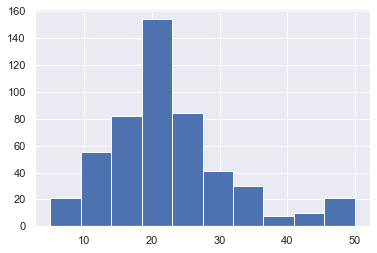

In [33]:
df['price'].hist()

In [12]:
df['price'][:5]

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: price, dtype: float64

0    3.218876
1    3.117950
2    3.575151
3    3.538057
4    3.616309
Name: log_price, dtype: float64


<AxesSubplot:>

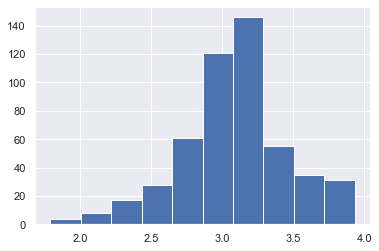

In [104]:

df['log_price'] = np.log1p(df['price'])
print(df['log_price'][:5])
df['log_price'].hist()

In [22]:
# scaler = StandardScaler()
# df["log_scaler_price"] = scaler.fit_transform(df["log_price"].values.reshape(-1,1))
# print(df["log_scaler_price"][:5])
# df["log_scaler_price"].hist()

# 2차 점수
- log변환
- 점수 매우 좋아졌다

In [105]:
df.drop(['price'], axis=1, inplace=True)

In [106]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'log_price'],
      dtype='object')

In [107]:
models = [ ("LR", LinearRegression()), 
           ("DT", DecisionTreeRegressor()), 
           ("RIDGE", Ridge()), 
           ("LASSO", Lasso())
         ]
X = df.drop('log_price', axis=1)
y = df['log_price']

my_eval(X, y, models)

LR : 0.0399
DT : 0.0314
RIDGE : 0.0394
LASSO : 0.1122


# 3차 점수
- 규제 적용

- RIDGE : 23.4635 ---- 0.0394
- LASSO : 33.7313 ---- 0.1122

In [40]:
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=1.0)

In [46]:
y= df['log_price']
X= df.drop(['log_price'],axis=1)

alpha_list = [0.001, 0.01, 0.5, 1.0, 50, 100, 1000]

for MY_ALPHA in alpha_list:
    models = [('RIDGE', Ridge(alpha = MY_ALPHA)),
          ('LASSO', Lasso(alpha = MY_ALPHA))
         ]
    print(f'alpha : {MY_ALPHA}')
    my_eval(X,y,models)
    print()
#----------------------------
 


alpha : 0.001
RIDGE : 0.0399
LASSO : 0.0395

alpha : 0.01
RIDGE : 0.0399
LASSO : 0.0424

alpha : 0.5
RIDGE : 0.0395
LASSO : 0.0818

alpha : 1.0
RIDGE : 0.0394
LASSO : 0.1122

alpha : 50
RIDGE : 0.0412
LASSO : 0.1946

alpha : 100
RIDGE : 0.0420
LASSO : 0.1946

alpha : 1000
RIDGE : 0.0476
LASSO : 0.1946



- 위 경우를 봤을때 규제==1을 기준으로 했을 때, Lasso는 규제를 완화시키는게 성능이 더 좋아지는 것을 확인했다.
- Ridge는 아무 조치도 취하지 않았을 때, 즉 규제==1일때 가장 최적의 점수

# 4차 점수 
- 피쳐 가공
    * 주요피쳐 왜도 --> 로그변환 --> 성능개선 X 확인
    * CHAS     --> StandardScaler() --> 성능개선 X 확인
    * outlier  --> LSTATE 2rows drop --> o
- LASSO : 33.7313 ---- 0.1122 ---(a: 0.001로 설정했을때 일단 가장 최적 성능)



In [49]:
model = Lasso(alpha = 0.001)

In [50]:
y=df['log_price']
X = df.drop('log_price', axis=1)

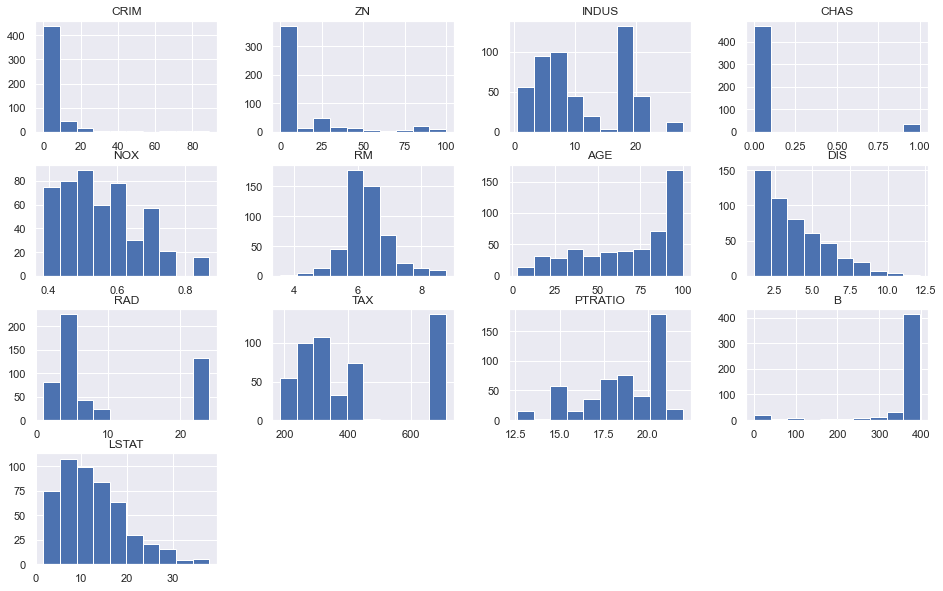

In [51]:
X.hist(figsize=(16, 10))
plt.show()
# 카테고리성은 변환하면 안된다. (이산형은 손대는 것이 아니다)
# 스케일링이나 로그 변환은 연속형 변수에만 적용

## 왜도 체크

In [59]:
from scipy.stats import skew
skew(X)
s = pd.Series(skew(X), index = X.columns)
s.sort_values(ascending=False)
# 정규분포 왜도는 0이다.
# +-2정도는 봐줄만하다.
# 위에서 CHAS는 범주형이라는 것을 알았으므로 스케일링 할 필요 없다.
# 왜도 큰건 CRIM, B정도로 확인해볼 수 있다.
# 특정 feature 몇개만 로그 변환 해볼 것이다.

CRIM       5.207652
CHAS       3.395799
ZN         2.219063
DIS        1.008779
RAD        1.001833
LSTAT      0.903771
NOX        0.727144
TAX        0.667968
RM         0.402415
INDUS      0.294146
AGE       -0.597186
PTRATIO   -0.799945
B         -2.881798
dtype: float64

* CRIM B 로그변환 : np.log1p
* CHAS(0, 1)를 제외한 모든 피쳐 : StandardScaler()
* outlier : 주요피쳐(coef_가 큰 피쳐)만을 대상으로만 -- W가 높으면 중요한 feature인거야 그럼?

In [60]:
X.describe() # mean을 보면 들쑥날쑥하다. ==> standardscaler 필요

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [108]:
models = [("LASSO", Lasso(alpha = 0.001))] # 0.0395
y = df['log_price']
X = df.drop(['log_price'], axis=1)


In [69]:
X[['CRIM', 'B']] = np.log1p(X[['CRIM', 'B']])
my_eval(X,y,model)

LASSO : 0.0457


In [73]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(X[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']])
X_scaler_df = pd.DataFrame(X_scaler, columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'])
X_scaler_df['CHAS'] = X['CHAS']
X_scaler_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-1.269348,0.284830,-1.287909,0.0,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.217045,-1.075562
1,-1.154111,-0.487722,-0.593381,0.0,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.217045,-0.492439
2,-1.154215,-0.487722,-0.593381,0.0,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.211305,-1.208727
3,-1.127988,-0.487722,-1.306878,0.0,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.213853,-1.361517
4,-0.955174,-0.487722,-1.306878,0.0,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.217045,-1.026501


In [78]:
my_eval(X_scaler_df, y, models)

LASSO : 0.0463


## 아웃라이어 제거

<AxesSubplot:xlabel='LSTAT', ylabel='log_price'>

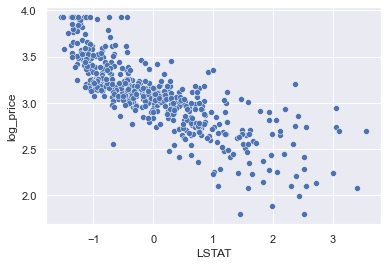

In [81]:
sns.scatterplot(y= y,x=  X_scaler_df['LSTAT'])

In [83]:
# 아웃라이어
X_scaler_df[X_scaler_df['LSTAT']>3.2]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
374,1.581818,-0.487722,1.015999,0.0,0.978765,-3.058221,1.117494,-1.263551,1.661245,1.530926,0.806576,0.217045,3.548771
414,1.734398,-0.487722,1.015999,0.0,1.194724,-2.515426,1.117494,-1.015789,1.661245,1.530926,0.806576,-0.794128,3.409999


In [84]:
X_scaler_df.drop([374, 414], axis=0, inplace=True)

In [113]:
y = y.drop([374,414])

(504, 13)

In [86]:
# 아웃라이어 한두개 지우기만 해도 점수가 확 좋아진다.
my_eval(X_scaler_df, y, models)

LASSO : 0.0360


# 5차 점수
- 스케일링 해보고 아웃라이어만 제거해보자
- cross_val_score() : cv=5회

LASSO : 33.7313 ---- 0.1122 ----(a:0.001 0.0395) --> 0.0351(스케일러, 주요 coef_ : LSTAT 2rows 아웃라이어 삭제)

In [114]:
scores = -1 * cross_val_score(Lasso(alpha=0.001), X_scaler_df, y, scoring = 'neg_mean_squared_error', cv=5).mean()

In [115]:
scores

0.04504444798403479